## Rung 3

(4-6 mins)

### HAPI Client

#### Task 24: Exploring HAPI Data and Metadata 
 - **Description:** Download data and metadata for the first five rows of a dataset of your choice from HAPI's "TestData2.0" server. Include the time parameter and one other parameter of your choice. Find the appropriate time range for your dataset that includes only the first five rows of data (i.e. do not download then slice more data than needed). Show work for how you found the necessary metadata to make your call.
 - **Expected Learning Outcome:** Exploring HAPI metadata to find info needed to make correct hapi() calls.
 - **Hints:** List servers to find "TestData2.0" URL, list its catalog to find datasets, look at dataset metadata.


In [1]:
# Idealized developer minutes: 5

from hapiclient import hapi
servers = hapi()
print("Finding TestData2.0 server:")
display(servers)

server =  'http://hapi-server.org/servers/TestData2.0/hapi'
catalog = hapi(server)
print("Listing datasets to pick from:")
display(catalog)

dataset = 'dataset1'
meta = hapi(server, dataset)
print("Inspecting dataset's metadata to find startDate & cadence:")
display(meta)

start = meta['startDate']  #1970-01-01Z
cadence = meta['cadence']  # PT1S
stop = '1970-01-01T00:00:05Z'  # start + 5 seconds
time_param = 'Time'
my_param = 'scalar'
parameters = ','.join([time_param, my_param])

data, meta = hapi(server, dataset, parameters, start, stop)
print("Displaying requested data and metadata:")
display(data)
display(meta)

Finding TestData2.0 server:


['http://hapi-server.org/servers/SSCWeb/hapi',
 'https://cdaweb.gsfc.nasa.gov/hapi',
 'https://imag-data.bgs.ac.uk/GIN_V1/hapi',
 'https://iswa.gsfc.nasa.gov/IswaSystemWebApp/hapi',
 'http://lasp.colorado.edu/lisird/hapi',
 'http://hapi-server.org/servers/TestData2.0/hapi',
 'https://amda.irap.omp.eu/service/hapi',
 'https://vires.services/hapi',
 'https://api.helioviewer.org/hapi/Helioviewer/hapi',
 'https://csatools.esac.esa.int/HapiServer/hapi']

Listing datasets to pick from:


{'catalog': [{'id': 'dataset1', 'title': 'Dataset w/valid HAPI 2.0'},
  {'id': 'dataset2',
   'title': 'Dataset w/valid HAPI 2.0 - Same as dataset1 but at PT1H resolution'},
  {'id': 'dataset3',
   'title': 'Dataset w/valid HAPI 2.0 - Same as dataset1 but at P1D resolution'}],
 'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'}}

Inspecting dataset's metadata to find startDate & cadence:


{'startDate': '1970-01-01Z',
 'stopDate': '2016-12-31Z',
 'sampleStartDate': '1970-01-01Z',
 'sampleStopDate': '1970-01-01T00:00:11Z',
 'cadence': 'PT1S',
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'fill': None,
   'length': 24},
  {'name': 'scalar',
   'type': 'double',
   'units': 'm',
   'fill': '-1e31',
   'description': 'Sine wave with 600 s period'},
  {'name': 'scalarint',
   'type': 'integer',
   'units': 'm',
   'fill': '-1e31',
   'description': 'Sine wave with 600 s period'},
  {'name': 'scalarstr',
   'type': 'string',
   'units': None,
   'fill': None,
   'length': 3,
   'description': 'Status checks result; P = Pass, F = Fail'},
  {'name': 'scalarcats',
   'type': 'integer',
   'units': None,
   'fill': None,
   'x_categorymap': {'good': 0, 'bad ': 1, 'ugly': 2},
   'description': 'Category of test result'},
  {'name': 'scalariso',
   'type': 'isotime',
   'units': 'UTC',
   'fill': '0000-00-00:T00:00:00Z',
   'length': 20,
   'descriptio

Displaying requested data and metadata:


array([(b'1970-01-01T00:00:00.000Z', 0.        ),
       (b'1970-01-01T00:00:01.000Z', 0.00523596),
       (b'1970-01-01T00:00:02.000Z', 0.01047178),
       (b'1970-01-01T00:00:03.000Z', 0.01570732),
       (b'1970-01-01T00:00:04.000Z', 0.02094242)],
      dtype=[('Time', 'S24'), ('scalar', '<f8')])

{'startDate': '1970-01-01Z',
 'stopDate': '2016-12-31Z',
 'sampleStartDate': '1970-01-01Z',
 'sampleStopDate': '1970-01-01T00:00:11Z',
 'cadence': 'PT1S',
 'parameters': [{'name': 'Time',
   'type': 'isotime',
   'units': 'UTC',
   'fill': None,
   'length': 24},
  {'name': 'scalar',
   'type': 'double',
   'units': 'm',
   'fill': '-1e31',
   'description': 'Sine wave with 600 s period'}],
 'HAPI': '2.0',
 'status': {'code': 1200, 'message': 'OK'},
 'x_server': 'http://hapi-server.org/servers/TestData2.0/hapi',
 'x_dataset': 'dataset1',
 'x_parameters': 'Time,scalar',
 'x_time.min': '1970-01-01Z',
 'x_time.max': '1970-01-01T00:00:05Z',
 'x_requestDate': '2024-05-17T19:58:38',
 'x_cacheDir': '/tmp/hapi-data/hapi-server.org_servers_TestData2.0_hapi',
 'x_downloadTime': 0.10750937461853027,
 'x_readTime': 9.107589721679688e-05,
 'x_metaFileParsed': '/tmp/hapi-data/hapi-server.org_servers_TestData2.0_hapi/dataset1___.pkl',
 'x_dataFileParsed': '/tmp/hapi-data/hapi-server.org_servers_TestD

#### Task 25: Plotting HAPI Data
 - **Description:** Write a one-liner that plots four hours of the "B_NEC" parameter of the "SW_OPER_MAGA_LR_1B" dataset from the VirES HAPI server. Excluding any import statements, you may only use one line of code with one function call.
 - **Expected Learning Outcome:** Basic plotting with hapiplot, bypassing intermediate steps. Also some digging around the VirES HAPI metadata to find a time range.
 - **Hints:** List all HAPI servers to find VirES URL; inspect dataset metadata to find a four-hour time range; use the hapiplot() function.

0.2.2


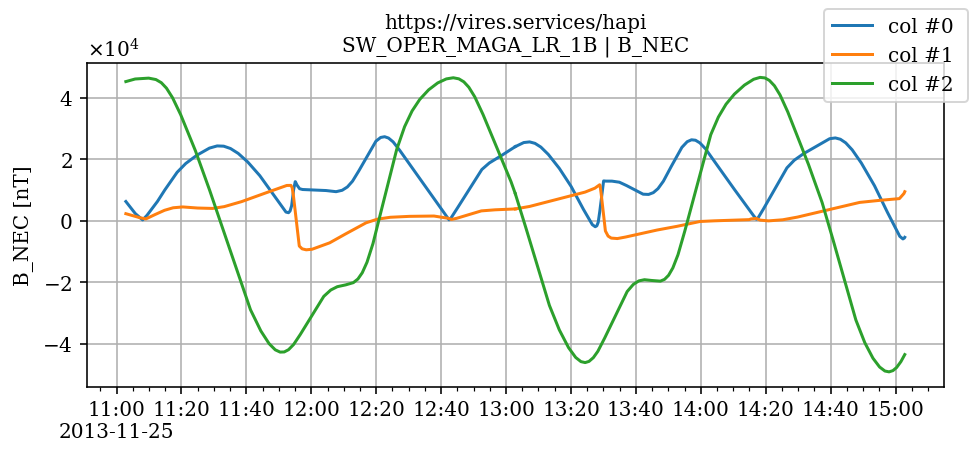

In [2]:
# Idealized developer minutes: 4

#%pip install hapiplot --upgrade

from hapiplot import hapiplot
from importlib.metadata import version

print(version('hapiplot'))

meta = hapiplot('https://vires.services/hapi', 'SW_OPER_MAGA_LR_1B', 'B_NEC', '2013-11-25T11:02:52Z', '2013-11-25T15:02:52Z')

#### Task 26: Plot HAPI data with pySPEDAS/PyTplot
 - **Description:** Using pySPEDAS, load into tplot variables the "SW_P_Den" and "SW_V" parameters of the "GE_K0_CPI" dataset from CDAWeb, in the time range 12:00:40Z 1992-09-09 to 00:00:00.000Z 1992-09-10. Then plot those parameters with PyTplot.
 - **Expected Learning Outcome:** Using pySPEDAS's pyhapi() feature.
 - **Hints:** Use pySPEDAS's pyhapi() function then PyTplot's tplot() function.

(From "[`hapiplot` - Basic](https://github.com/heliophysicsPy/summer-school/blob/3d500979226eee45ad506e6e4a0d67d0f37f5715/hapi-tutorial/HAPI_03.ipynb)")

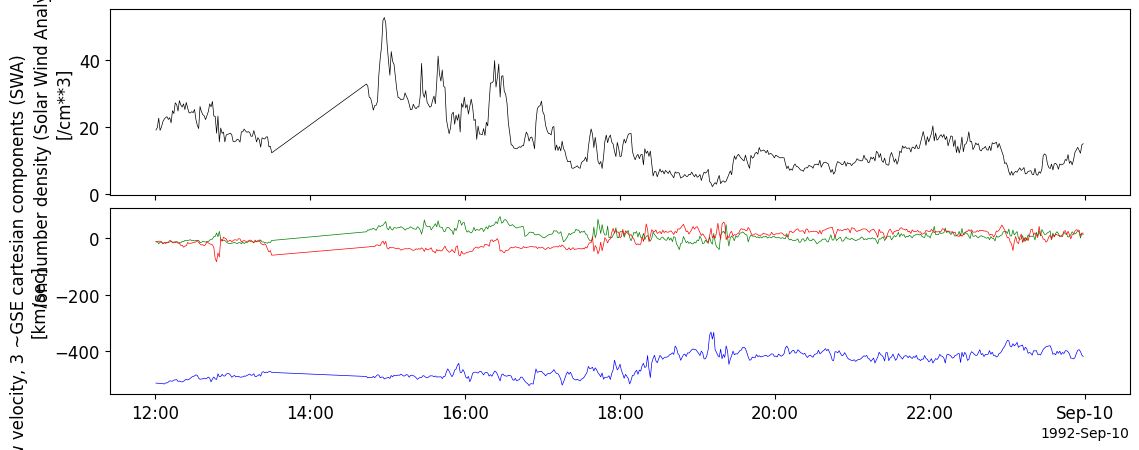

In [3]:
# Idealized developer minutes: 5

from pyspedas.hapi.hapi import hapi as pyhapi
from pytplot import tplot

server     = 'https://cdaweb.gsfc.nasa.gov/hapi'
dataset    = 'GE_K0_CPI'
parameters = 'SW_P_Den,SW_V'
start      = '1992-09-09T12:00:40Z'
stop       = '1992-09-10T00:00:00.000Z'

x = pyhapi(trange=[start, stop], server=server, dataset=dataset, parameters=parameters)
tplot(x)

### Kamodo

#### Task 27: Generate an Interactive Plot of a Kamodo Object
 - **Description:** Functionalize the following new dataset made up of numpy arrays for time, lon, lat, and a variable 'speed' in km/s, then generate an interactive plot of the result:
 ```
import numpy as np
coord_dict = {'time': {'units': 'hr', 'data': np.linspace(0., 24., 25)},
              'lon': {'units': 'deg', 'data': np.linspace(-180., 180., 37)},
              'lat': {'units': 'deg', 'data': np.linspace(-90., 90., 19)}}
var_dict = {'speed': {'units': 'km/s', 'data': np.random.RandomState(1).rand(25, 37, 19)}}
 ```
 - **Expected Learning Outcome:** How to generate an interactive plot of a Kamodo object.
 - **Hints:** Kamodo objects have a plot() function.

17-May-24 19:58:44: /srv/conda/envs/notebook/lib/python3.10/site-packages/kamodo/util.py:21: DeprecationWarning: 

  `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
  of the deprecation of `distutils` itself. It will be removed for
  Python >= 3.12. For older Python versions it will remain present.
  It is recommended to use `setuptools < 60.0` for those Python versions.
  For more details, see:
    https://numpy.org/devdocs/reference/distutils_status_migration.html 


  from numpy.distutils.exec_command import exec_command

kj/filesystem-disk-unix.c++:1734: warning: PWD environment variable doesn't match current directory; pwd = /home/jovyan


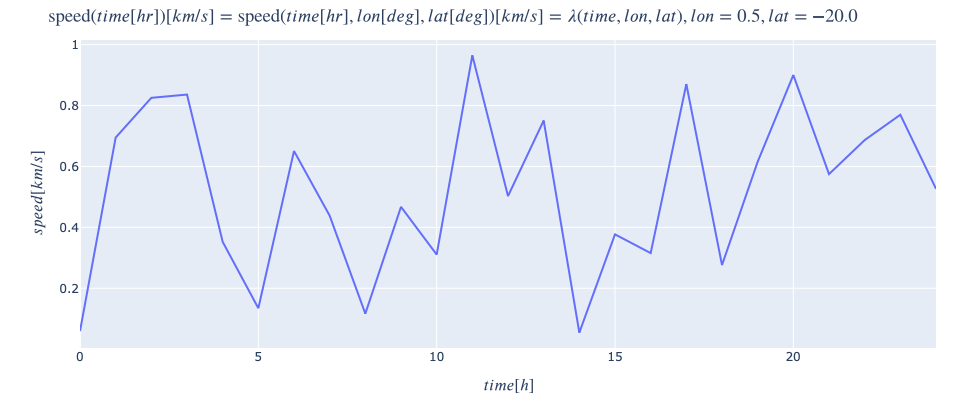

In [4]:
# Idealized developer minutes: 5

from kamodo_ccmc.tools.functionalize import Functionalize_Dataset
import numpy as np

coord_dict = {'time': {'units': 'hr', 'data': np.linspace(0., 24., 25)},
              'lon': {'units': 'deg', 'data': np.linspace(-180., 180., 37)},
              'lat': {'units': 'deg', 'data': np.linspace(-90., 90., 19)}}
var_dict = {'speed': {'units': 'km/s', 'data': np.random.RandomState(1).rand(25, 37, 19)}}
kamodo_object = Functionalize_Dataset(coord_dict, var_dict)
kamodo_object.plot('speed', plot_partial={'speed': {'lon': 0.5, 'lat': -20.}})

#### Task 28: Extract GITM Data
 - **Description:** Extract the value of 'TEC' from a provided GITM run at 2015-03-14 01:00 UT, 30 degrees longitude, and 75 degrees latitude. NOTE: this will require local model output at `'/home/jovyan/scratch_space/data/GITM/GITM_small_test_data/'`.
 - **Expected Learning Outcome:** Extracting specific data from a model run.
 - **Hints:** First make a Kamodo object with requested variables 'rho_n' and 'TEC', then extract from it.

In [5]:
# Idealized developer minutes: 5

import kamodo_ccmc.flythrough.model_wrapper as MW

reader = MW.Model_Reader('GITM')
file_dir = '/home/jovyan/scratch_space/data/GITM/GITM_small_test_data/'
!ls /home/jovyan/scratch_space/data/GITM/GITM_small_test_data/
variables = ['rho_n', 'TEC']
kamodo_object = reader(file_dir, variables_requested=variables)
kamodo_object.TEC([1., 30., 75.])

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
3DLST_t150314_000000.nc  3DLST_t150314_005000.nc  3DLST_t150314_015000.nc
3DLST_t150314_002000.nc  3DLST_t150314_010000.nc  3DLST_t150314_020000.nc
3DLST_t150314_003000.nc  3DLST_t150314_011000.nc  GITM_list.txt
3DLST_t150314_004000.nc  3DLST_t150314_013000.nc  GITM_times.txt
Time slice index 4 added from file.
Time slice index 5 added from file.
Time slice index 6 added from file.


array([10.59780216])

### pysat

#### Task 29: Create an ICON IVM Instrument and Load Data
 - **Description:** Import the pysatNASA package and register its instruments with pysat. After registration, create an ICON IVM instrument and load data. Then try inspecting the data in the instrument object once loaded.
 - **Expected Learning Outcome:** How to load data with a pysat instrument object. Once you have a library package and its instruments registered you can instantiate an instrument and load data. Once the data is loaded try inspecting the data in the instrument object.
 - **Hints:** Set `data_dirs`; register pysatNASA; create the instrument; load the data; show the data.

In [6]:
# Idealized developer minutes: 5

import pysat
import pysatNASA
import datetime as dt

pysat.params['data_dirs'] = '.'
pysat.utils.registry.register_by_module(pysatNASA.instruments)

ivm = pysat.Instrument('icon', 'ivm', inst_id='a', clean_level='clean')
start_download_date = dt.datetime(2020, 1, 1)
stop_download_date = dt.datetime(2020, 1, 4)
ivm.load(2020, 1)
ivm.data #(to show the data)
#Note: if this returns an empty instrment, you may need to download the data:
# ivm.download(start_download_date, stop_download_date)

17-May-24 19:59:18: /srv/conda/envs/notebook/lib/python3.10/site-packages/pysat/_instrument.py:523: DeprecationWarning:

The instrument module `jpl_gps` has been deprecated and will be removed in 0.1.0+.


17-May-24 19:59:18: /tmp/ipykernel_7075/434218496.py:13: UserWarning:

No files found for Instrument. If files are expected, please confirm that data is present on the system and that pysat.params['data_dirs'] is set correctly.


17-May-24 19:59:18: /tmp/ipykernel_7075/434218496.py:13: DeprecationWarning:

In pysat version 3.3.0+ the subsequent IndexError will not be raised.




Empty DataFrame
Columns: []
Index: []

### pySPEDAS

#### Task 30: pySPEDAS/PyTplot: Use Simple Analysis Tool
 - **Description:** Using PySPEDAS/PyTplot, load six hours of Parker Solar Probe L2 magnetometer data (start time: 2023-03-23/00:00:00). Then perform smoothing on the variable "psp_fld_l2_mag_RTN" (with a window size of 60) and plot the original and smoothed results.
 - **Expected Learning Outcome:** That pySPEDAS has analysis tools to use.
 - **Hints:**  psp.fields(), datatype='mag_rtn'; pyspedas.tsmooth(), width=60

20-May-24 18:17:15: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2023/
20-May-24 18:17:16: File is current: psp_data/fields/l2/mag_rtn/2023/psp_fld_l2_mag_rtn_2023032300_v02.cdf
20-May-24 18:17:16: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2023/
20-May-24 18:17:16: File is current: psp_data/fields/l2/mag_rtn/2023/psp_fld_l2_mag_rtn_2023032300_v02.cdf
20-May-24 18:18:55: tsmooth was applied to: psp_mag_RTN_smoothed


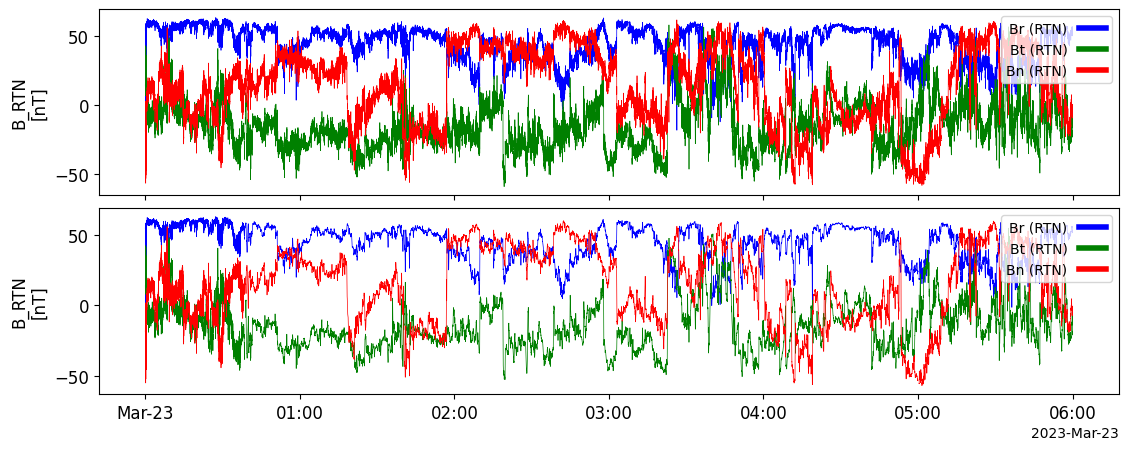

In [1]:
# Idealized developer minutes: 4

import pyspedas
from pytplot import tplot

psp_vars = pyspedas.psp.fields(trange=["2023-03-23/00:00:00","2023-03-23/06:00:00"],datatype='mag_rtn')

pyspedas.tsmooth('psp_fld_l2_mag_RTN',width=60, newname='psp_mag_RTN_smoothed')

tplot(["psp_fld_l2_mag_RTN","psp_mag_RTN_smoothed"])

#### Task 31: PyTplot Plot Customization: Line Colors
 - **Description:** Using pySPEDAS, load THEMIS state data for probe A on 2023-03-24. Then set the PyTplot line colors for 'tha_pos' to cyan, magenta, and black before plotting the data.
 - **Expected Learning Outcome:** How to customize line colors with tplot
 - **Hints:** pyspedas.themis.state(); pytplot.options(), "color", ["c", "m", "k"]

20-May-24 18:18:57: File is current: themis_data/tha/l1/state/2023/tha_l1_state_20230324.cdf


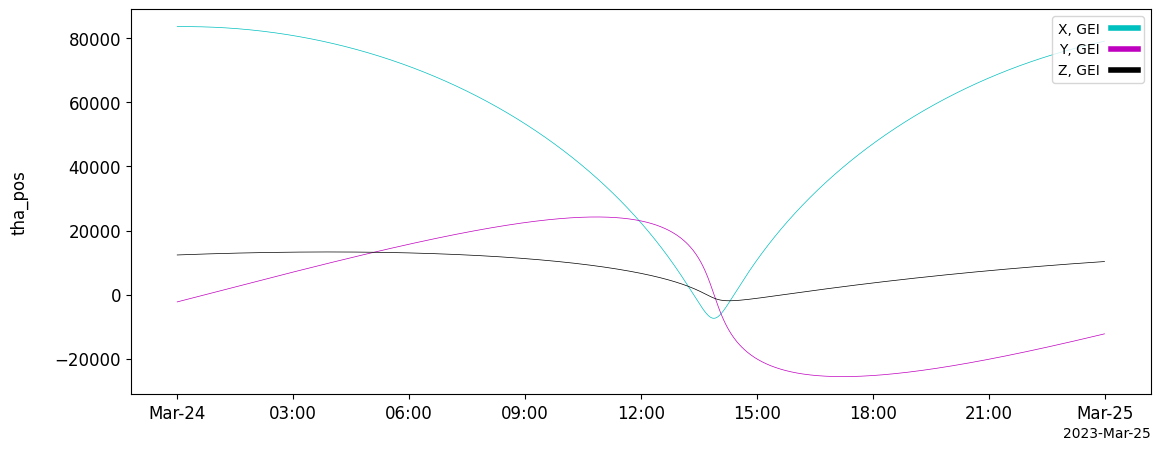

In [2]:
# Idealized developer minutes: 4

import pyspedas
from pytplot import options, tplot

pyspedas.themis.state(trange=["2023-3-24","2023-03-25"], probe="a")
options('tha_pos','color',['c','m','k'])

tplot('tha_pos')

#### Task 32: Magnetic Field Modeling: T89 Model
 - **Description:** Using pySPEDAS, load THEMIS state data for probe A, 2023-03-24, in GSM coordinates. Then, using the T89 model, generate the expected field at the THEMIS-A times and GSM positions (using the default model parameter). Plot the modeled field.
 - **Expected Learning Outcome:** How to use the T89 field model.
 - **Hints:** pyspedas.themis.state(), varnames="tha_pos_gsm"; from pyspedas.geopack import tt89; tt89(position_variable); position variable + "_bt89"

20-May-24 18:18:58: File is current: themis_data/tha/l1/state/2023/tha_l1_state_20230324.cdf


Load IGRF coefficients ...
['tha_pos_gsm']


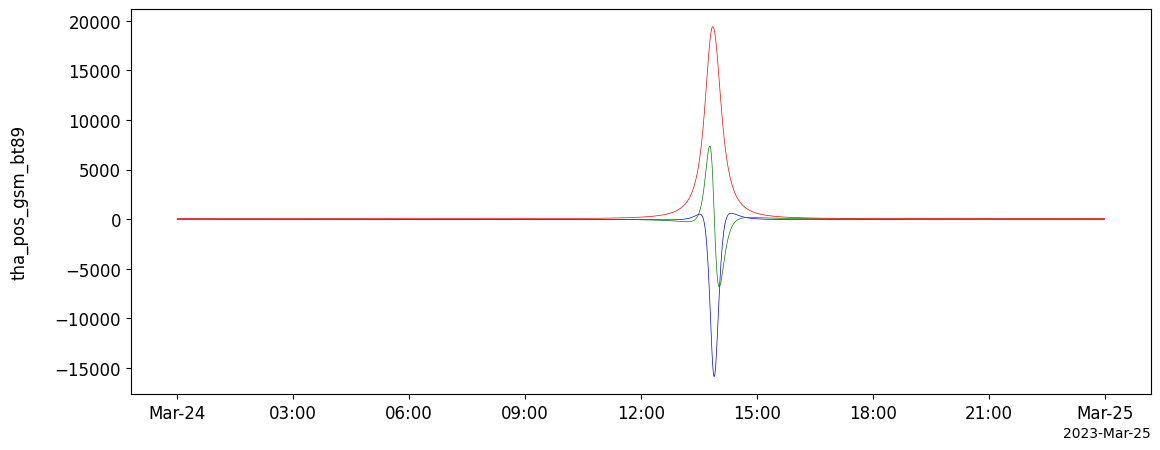

In [3]:
# Idealized developer minutes: 5

import pyspedas
from pyspedas.geopack import tt89
from pytplot import tplot

state_vars = pyspedas.themis.state(probe='a',trange=["2023-03-24","2023-03-25"],varnames=["tha_pos_gsm"])
print(state_vars)
tt89('tha_pos_gsm')
tplot('tha_pos_gsm_bt89')

#### Task 33: Magnetic Field Modeling: T96 model (ORIG)
 - **Description:** Using pySPEDAS, load THEMIS state data for probe A, 2023-03-24, in GSM coordinates. Then download T96 model parameters from OMNI and the Kyoto WDC. Then generate the expected field using the T96 model at the THEMIS-A times and GSM positions, using the downloaded model parameters.

 Use this helper function:
 ```python
def get_params(trange):
    support_trange = [time_double(trange[0])-60*60*24, 
                      time_double(trange[1])+60*60*24]
    pyspedas.kyoto.dst(trange=support_trange)
    pyspedas.omni.data(trange=support_trange)
    join_vec(['BX_GSE', 'BY_GSM', 'BZ_GSM'])
    return get_tsy_params('kyoto_dst',
                          'BX_GSE-BY_GSM-BZ_GSM_joined',
                          'proton_density',
                          'flow_speed',
                          model='t96',
                          pressure_tvar='Pressure',
                          g_variables=None,
                          speed=True)
 ```
 - **Expected Learning Outcome:** How to use the T96 magnetopause model.
 - **Hints:** pyspedas.themis.state(), varnames="tha_pos_gsm"; from pyspedas.geopack import tt96; tt96(position_variable,params); position variable + "_bt96"

20-May-24 18:19:01: **************************************************************************************
20-May-24 18:19:01: The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
20-May-24 18:19:01:  are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
20-May-24 18:19:01:  the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
20-May-24 18:19:01:  [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
20-May-24 18:19:01:  make the Dst index available.
20-May-24 18:19:01: **************************************************************************************
20-May-24 18:19:01: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2023/
20-May-24 18:19:01: File is current: omni_data/hro2_1min/2023/omni_hro2_1min_20230301_v01.cdf
20-May-24 18:19:01: /srv/conda/envs/notebook/lib/python3.10/site-packages/astropy/utils/exceptions.py:82: Astropy

['tha_pos_gsm']


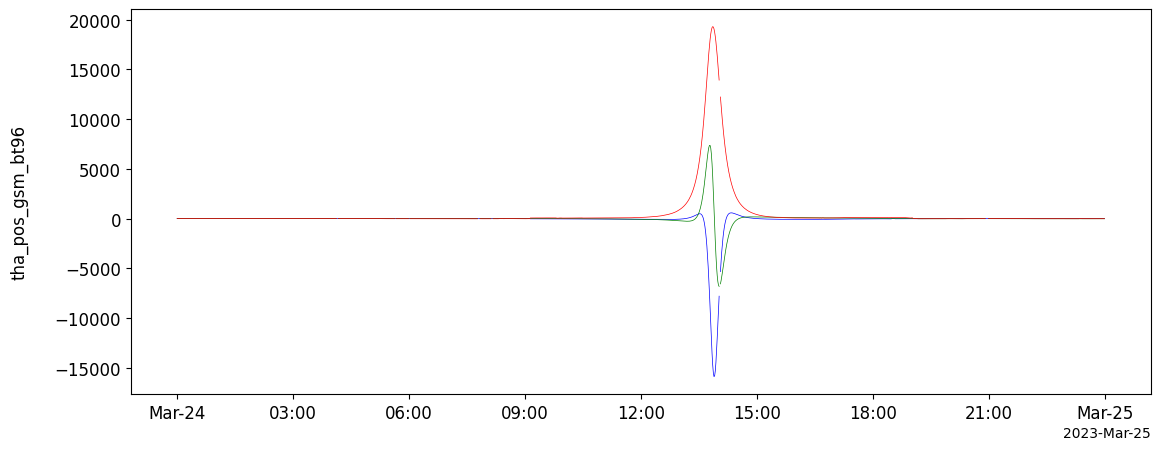

In [4]:
# (ORIG)
# Idealized developer minutes: 6

import pyspedas
from pyspedas.geopack import tt96, get_tsy_params
from pytplot import tplot,join_vec, time_double

def get_params(trange):
    support_trange = [time_double(trange[0])-60*60*24, 
                      time_double(trange[1])+60*60*24]
    pyspedas.kyoto.dst(trange=support_trange)
    pyspedas.omni.data(trange=support_trange)
    join_vec(['BX_GSE', 'BY_GSM', 'BZ_GSM'])
    return get_tsy_params('kyoto_dst',
                          'BX_GSE-BY_GSM-BZ_GSM_joined',
                          'proton_density',
                          'flow_speed',
                          model='t96',
                          pressure_tvar='Pressure',
                          g_variables=None,
                          speed=True)

parmod = get_params(["2023-03-24","2023-03-25"])
state_vars = pyspedas.themis.state(probe='a',trange=["2023-03-24","2023-03-25"],varnames=["tha_pos_gsm"])
print(state_vars)
tt96('tha_pos_gsm',parmod)
tplot('tha_pos_gsm_bt96')

#### Task 33: Magnetic Field Modeling: T96 model (NEW)
 - **Description:** Using pySPEDAS, load THEMIS state data for probe A, 2023-03-24, in GSM coordinates. Then download T96 model parameters from OMNI and the Kyoto WDC. Then generate the expected field using the T96 model at the THEMIS-A times and GSM positions, using the downloaded model parameters.

 Use this helper function:
 ```python
from pyspedas.geopack import get_tsy_params
from pytplot import time_double

def get_params(trange, position_var):
    support_trange = [time_double(trange[0])-60*60*24, 
                      time_double(trange[1])+60*60*24]
    pyspedas.kyoto.dst(trange=support_trange)
    pyspedas.omni.data(trange=support_trange)
    join_vec(['BX_GSE', 'BY_GSM', 'BZ_GSM'])
    parmod = get_tsy_params('kyoto_dst',
                            'BX_GSE-BY_GSM-BZ_GSM_joined',
                            'proton_density',
                            'flow_speed',
                            model='t96',
                            pressure_tvar='Pressure',
                            g_variables=None,
                            speed=True)
    # The field models expect the model parameters to be supplied at the same timestamps
    # as the input positions, so we interpolate them with pyspedas.tinterpol()
    pyspedas.tinterpol(parmod,position_var,newname='parmod_interpolated')
    return 'parmod_interpolated'
 ```
 - **Expected Learning Outcome:** How to use the T96 magnetopause model.
 - **Hints:** pyspedas.themis.state(), varnames="tha_pos_gsm"; from pyspedas.geopack import tt96; tt96(position_variable,params); position variable + "_bt96"

20-May-24 18:23:42: File is current: themis_data/tha/l1/state/2023/tha_l1_state_20230324.cdf
20-May-24 18:23:45: **************************************************************************************
20-May-24 18:23:45: The DST data are provided by the World Data Center for Geomagnetism, Kyoto, and
20-May-24 18:23:45:  are not for redistribution (http://wdc.kugi.kyoto-u.ac.jp/). Furthermore, we thank
20-May-24 18:23:45:  the geomagnetic observatories (Kakioka [JMA], Honolulu and San Juan [USGS], Hermanus
20-May-24 18:23:45:  [RSA], Alibag [IIG]), NiCT, INTERMAGNET, and many others for their cooperation to
20-May-24 18:23:45:  make the Dst index available.
20-May-24 18:23:45: **************************************************************************************
20-May-24 18:23:45: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2023/
20-May-24 18:23:45: File is current: omni_data/hro2_1min/2023/omni_hro2_1min_20230301_v01.cdf
20-May-24 18:23:45: 

['tha_pos_gsm']


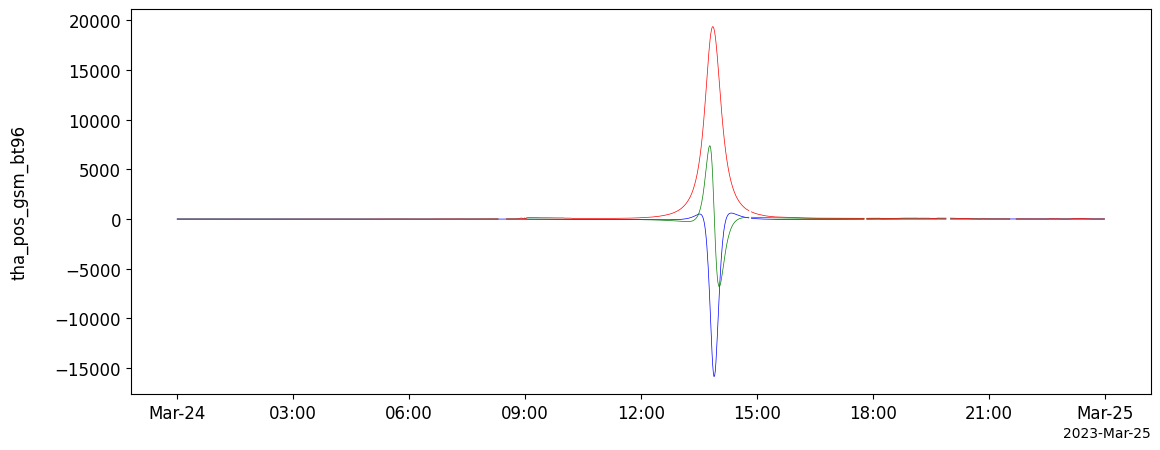

In [5]:
# (NEW)
# Idealized developer minutes: 6

import pyspedas
from pyspedas.geopack import tt96, get_tsy_params
from pytplot import tplot,join_vec, time_double

def get_params(trange, position_var):
    support_trange = [time_double(trange[0])-60*60*24, 
                      time_double(trange[1])+60*60*24]
    pyspedas.kyoto.dst(trange=support_trange)
    pyspedas.omni.data(trange=support_trange)
    join_vec(['BX_GSE', 'BY_GSM', 'BZ_GSM'])
    parmod = get_tsy_params('kyoto_dst',
                            'BX_GSE-BY_GSM-BZ_GSM_joined',
                            'proton_density',
                            'flow_speed',
                            model='t96',
                            pressure_tvar='Pressure',
                            g_variables=None,
                            speed=True)
    # The field models expect the model parameters to be supplied at the same timestamps
    # as the input positions, so we interpolate them with pyspedas.tinterpol()
    pyspedas.tinterpol(parmod,position_var,newname='parmod_interpolated')
    return 'parmod_interpolated'

state_vars = pyspedas.themis.state(probe='a',trange=["2023-03-24","2023-03-25"],varnames=["tha_pos_gsm"])
parmod = get_params(["2023-03-24","2023-03-25"], 'tha_pos_gsm')
print(state_vars)
tt96('tha_pos_gsm',parmod)
tplot('tha_pos_gsm_bt96')

### SunPy

#### Task 34: Plot the Latest Solar Image from SDO AIA
 - **Description:** Find the most recent image from SDO's AIA instrument at 171 Å using SunPy's Fido, then plot it.
 - **Expected Learning Outcome:** How to find and plot the latest data with SunPy.
 - **Hints:** Search with SunPy's Fido. Then, fetch the most recent result and plot it using SunPy's Map.

In [ ]:
# Idealized developer minutes: 6

from datetime import datetime, timedelta
import sunpy.map
from sunpy.net import Fido, attrs as a
import astropy.units as u

# Time range of today - now
time_start = datetime.now().strftime("%Y-%m-%d")
time_end = datetime.now().strftime("%Y-%m-%dT%H:%M:%S")

# Search for SDO images within the specified time range
results = Fido.search(a.Time(time_start, time_end), a.Instrument.aia, a.Wavelength(171*u.angstrom))

# Download the last result
downloaded_files = Fido.fetch(results[0, -1])

# Load & plot the image as a SunPy Map
latest_map = sunpy.map.Map(downloaded_files[0])
latest_map.peek()

### Misc.

#### Task 35: Time String Conversions
 - **Description:** Convert the time string '2005-06-01T13:33:00.1Z' into a datetime object, then into a timestamp, then back to a datetime object preserving UTC time.
 - **Expected Learning Outcome:** Performing common time string conversions.
 - **Hints:** Import and use `pytz`, `datetime`, and `dateutil`.

In [ ]:
# Idealized developer minutes: 4

import pytz
from datetime import datetime
from dateutil import parser

ds = '2005-06-01T13:33:00.1Z' # The Z specifies UTC
d1 = parser.parse(ds)
print('Datetime object:\n',d1)
d2 = d1.timestamp()
print('Timestamp:\n',d2)
d3 = datetime.utcfromtimestamp(d2)
print('Datatime object (TZ naive):\n',d3)
# This looks good, but further conversion will assume local timezone
d5 = pytz.utc.localize(d3)
print('Datetime object (TZ aware):\n',d5)